In [1]:
import numpy as np
import pandas as pd
import chardet

In [2]:
with open('./Churn_Modelling.csv', 'rb') as f:
    result = chardet.detect(f.read(100000))  
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")


df = pd.read_csv('./Churn_Modelling.csv', encoding=encoding)

Detected encoding: ascii


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
import sklearn 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.skew(numeric_only = True )

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [10]:
df.corr(numeric_only = True )

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
target = 'Exited' 
numerical_features = ['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard', 'IsActiveMember',
                      'EstimatedSalary']
categorical_features = ['Gender','Geography']

In [13]:
df[numerical_features].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>, <Axes: >, <Axes: >]],
      dtype=object)

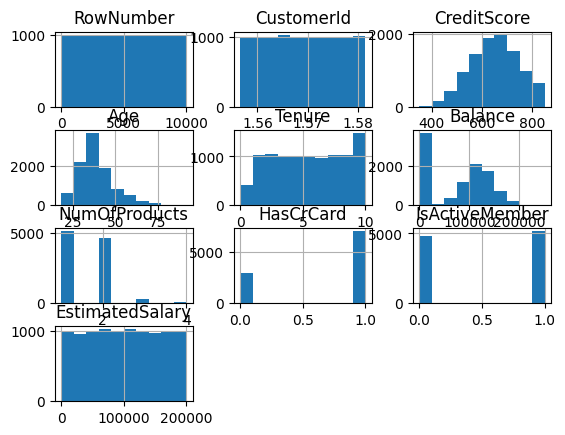

In [14]:
df[numerical_features].hist()

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>, <Axes: >, <Axes: >]],
      dtype=object)

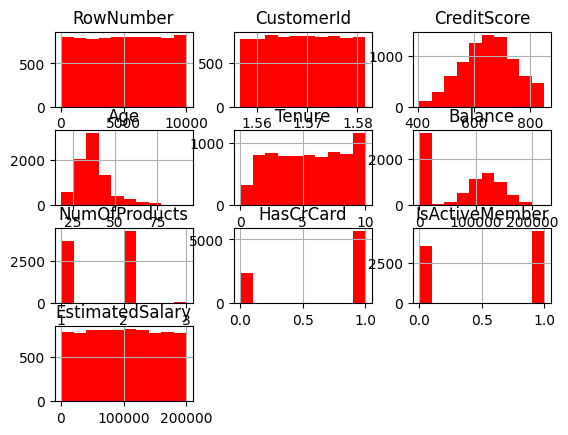

In [15]:
df[df[target] == 0 ][numerical_features].hist(color='red')

Text(0.5, 1.0, 'churned')

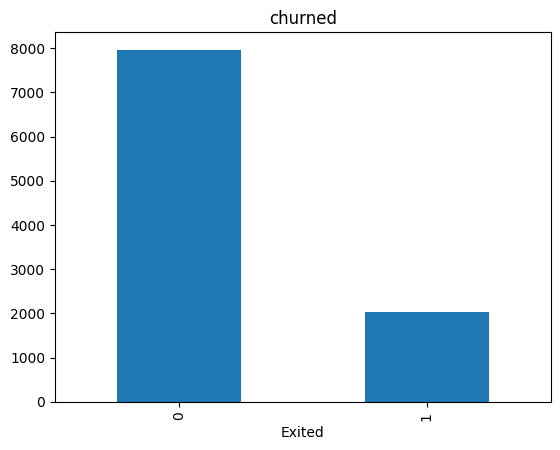

In [16]:
df[target].value_counts().plot(kind='bar').set_title('churned')

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df = df.drop(['CustomerId','Surname'],axis = 1 )

In [19]:
df.shape

(10000, 12)

In [20]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df = pd.get_dummies(data = df , columns = categorical_features ,drop_first = True )

In [22]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [23]:
from sklearn.model_selection import train_test_split
X =  df.drop(['Exited'],axis=1)
Y = df['Exited']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state=4)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
logModel = LogisticRegression()
logModel.fit(X_train,Y_train)

LogisticRegression()

In [25]:
predict = logModel.predict(X_test)

In [26]:
accuracy_score(Y_test,predict)

0.7985

In [27]:
confusion_matrix_1 = confusion_matrix(Y_test,predict)

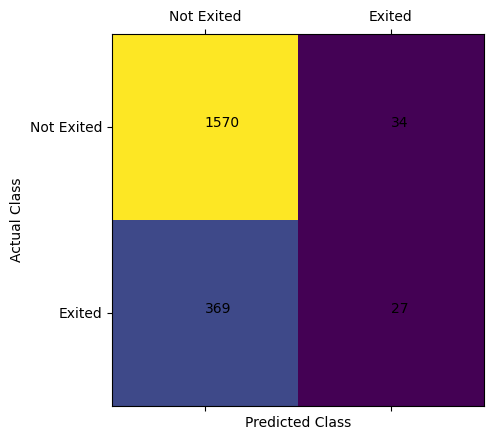

In [28]:
plt.matshow(confusion_matrix(Y_test,predict))

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2) : 
    for j in range(2) : 
        plt.text(j,i,confusion_matrix_1[i,j])

plt.xticks([0,1],['Not Exited','Exited'])
plt.yticks([0,1],['Not Exited','Exited'])
plt.show()

In [29]:
logModel.score(X_train,Y_train)

0.787375

In [30]:
from sklearn.svm import SVC
svcModel = SVC()
svcModel.fit(X_train,Y_train)
svc_pred = svcModel.predict(X_test)

In [31]:
confusion_matrix_svc = confusion_matrix(Y_test,svc_pred)

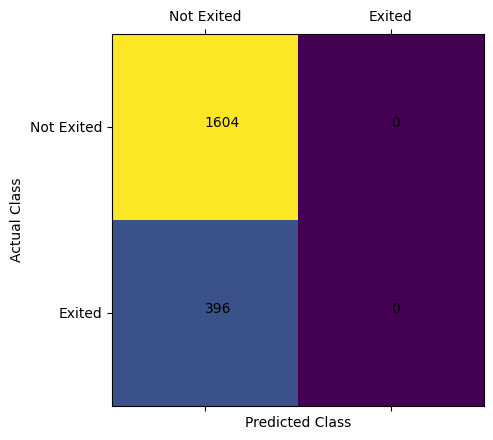

In [32]:
plt.matshow(confusion_matrix(Y_test,svc_pred))

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2) : 
    for j in range(2) : 
        plt.text(j,i,confusion_matrix_svc[i,j])

plt.xticks([0,1],['Not Exited','Exited'])
plt.yticks([0,1],['Not Exited','Exited'])
plt.show()

In [33]:
svcModel.score(X_train,Y_train)

0.794875

In [34]:
accuracy_score(Y_test,svc_pred)

0.802

In [35]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc_pred = dtc.predict(X_test)

In [36]:
dtc.score(X_train,Y_train)

1.0

In [37]:
accuracy_score(dtc_pred,Y_test)

0.792

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=30)
knc.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [39]:
knc_pred = knc.predict(X_test)

In [40]:
knc.score(X_train,Y_train)

0.795

In [41]:
accuracy_score(knc_pred,Y_test)

0.8005